In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [31]:
path = "R:/IISc/Sem 2/PRNN/Assignments/assignment-3-files/2class-Synthetic/data_noise_20.txt"

In [32]:
data = pd.read_csv(path, header=None)

In [33]:
data

,0,1,2
0,1.376753,0.739825,1.0
1,0.329439,0.500738,0.0
2,1.731511,0.448931,1.0
3,1.103169,0.261345,1.0
4,0.969949,0.365835,0.0
...,...,...,...
1995,1.606680,0.707524,1.0
1996,0.442800,0.314765,0.0
1997,0.382201,0.658721,1.0
1998,1.154889,0.657410,1.0


In [34]:
X = np.array(data.iloc[:, :2])
y = np.array(data.iloc[:, 2])
# y = y.reshape((y.shape[0], 1))

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [36]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [37]:
from sklearn.svm import SVC
from sklearn.svm import NuSVC

In [41]:
nu_range = [0.01, 0.05, 0.1, 0.15, 0.2, 0.25, 0.5, 0.75]
tr_acc = []
test_acc = []
sv2 = []
for nu in nu_range:
    clf = NuSVC(nu=nu, kernel='rbf')
    clf.fit(X_train, y_train)
    tr_acc.append(clf.score(X_train, y_train))
    test_acc.append(clf.score(X_test, y_test))
    sv2.append(clf.n_support_[0] + clf.n_support_[1])

Text(0.5, 1.0, 'Accuracy vs nu hyper-parameter in nuSVM for Polynomial kernel')

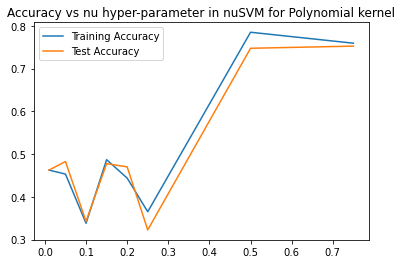

In [42]:
plt.plot(nu_range, tr_acc)
plt.plot(nu_range, test_acc)
plt.legend(["Training Accuracy", "Test Accuracy"])
plt.title("Accuracy vs nu hyper-parameter in nuSVM for Polynomial kernel")

Text(0.5, 1.0, 'Number of support vectors vs nu hyper-parameter in nuSVM')

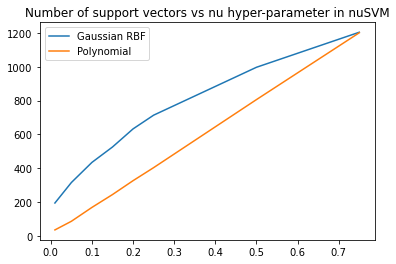

In [43]:
plt.plot(nu_range, sv2)
plt.plot(nu_range, sv)
plt.legend(["Gaussian RBF", "Polynomial"])
plt.title("Number of support vectors vs nu hyper-parameter in nuSVM")

In [23]:
# from sklearn.model_selection import GridSearchCV
# C_range = [1]
# gamma_range = [10]
# degree_range =[3, 4, 5, 6, 7, 8]
# # gamma_range = [1]
# # degree_range = [1]
# param_grid = {'C': C_range, 'degree':degree_range, 'kernel': ['rbf']} 
# grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
# grid.fit(X_train, y_train)

In [11]:
res = grid.cv_results_['mean_test_score']
# res = res.reshape((len(C_range), len(gamma_range)))
res

array([0.83125 , 0.549375, 0.799375, 0.549375, 0.7775  , 0.549375])

Text(0.5, 1.0, 'Gaussian RBF kernel Training accuracy after cross validated grid search')

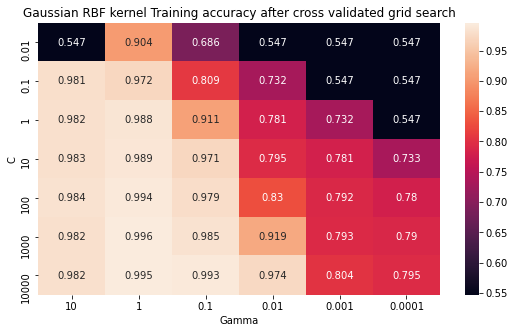

In [55]:
plt.figure(figsize=(9, 5))
sns.heatmap(res, annot=True, fmt='.3g', xticklabels=gamma_range, yticklabels=C_range)
plt.xlabel("Gamma")
plt.ylabel("C")
plt.title("Gaussian RBF kernel Training accuracy after cross validated grid search")

In [12]:
grid.best_estimator_.fit(X_train, y_train)

SVC(C=1, kernel='poly')

In [13]:
list(grid.best_estimator_.predict(X_test) == y_test).count(True)/X_test.shape[0]

0.86

In [14]:
grid.best_estimator_.n_support_

array([335, 336])

In [15]:
clf = SVC(C=1000, gamma=1, degree=3, kernel='rbf')
clf.fit(X_train, y_train)

SVC(C=1000, gamma=1)

In [16]:
list(clf.predict(X_train) == y_train).count(True)/X_train.shape[0]

0.99875

In [17]:
list(clf.predict(X_test) == y_test).count(True)/X_test.shape[0]

1.0

In [65]:
clf.n_support_

array([14, 14])

Text(0.5, 1.0, 'Support vectors for the Gaussian RBF kernel')

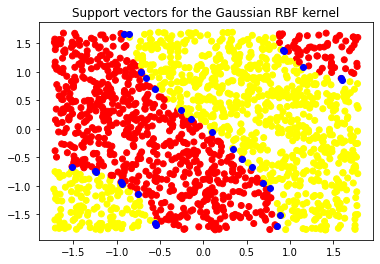

In [67]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='autumn')
plt.scatter(X_train[clf.support_, 0], X_train[clf.support_, 1], c='blue')
plt.title("Support vectors for the Gaussian RBF kernel")


In [ ]:
X_train[31, :]

In [34]:
degree = [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
train_scores_40 = []
test_scores_40 = []
for deg in degree:
    clf = SVC(kernel='poly', degree=deg)
    clf.fit(X_train, y_train)
    train_scores_40.append(clf.score(X_train, y_train))
    test_scores_40.append(clf.score(X_test, y_test))

([<matplotlib.axis.XTick at 0x23a6b04ed30>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

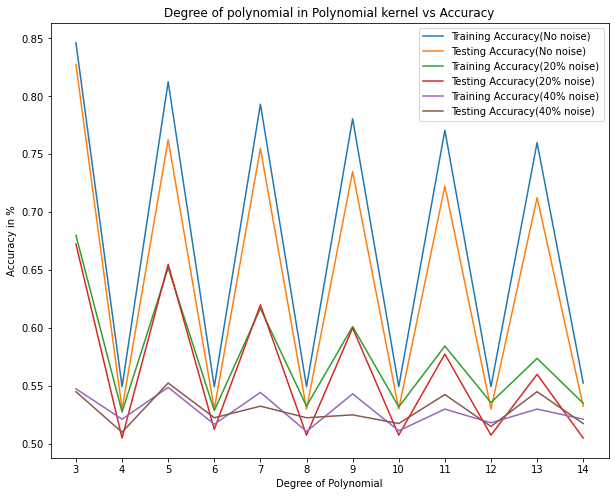

In [40]:
plt.figure(figsize=(10, 8))
plt.plot(degree, train_scores)
plt.plot(degree, test_scores)
plt.plot(degree, train_scores_20)
plt.plot(degree, test_scores_20)
plt.plot(degree, train_scores_40)
plt.plot(degree, test_scores_40)
plt.legend(["Training Accuracy(No noise)", "Testing Accuracy(No noise)", "Training Accuracy(20% noise)", "Testing Accuracy(20% noise)", "Training Accuracy(40% noise)", "Testing Accuracy(40% noise)"], loc="upper right" , )
plt.xlabel("Degree of Polynomial")
plt.ylabel("Accuracy in %")
plt.title("Degree of polynomial in Polynomial kernel vs Accuracy")
plt.xticks(degree)